# Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib.pyplot import imread
import cv2
from PIL import Image
import time
import os
import sys

# Import Modules from Source Code

In [2]:
sys.path.append("../")

In [3]:
from src.ImageCompressor import image_functions as img_func
from src.SVD import two_phase_svd
from src.VideoBackgroundExtractor import extractor

# Compare Performance of 2-Phase SVDs

In [4]:
Test_Matrix = np.random.rand(300, 300)
start = time.time()
s, v, d = two_phase_svd.svd_phase_A(Test_Matrix)
end = time.time()
print("Time for Phase IIA =", end - start)

start = time.time()
s, v, d = two_phase_svd.svd_phase_B(Test_Matrix)
end = time.time()
print("Time for Phase IIB =", end - start)

Total Iterations: 727
Time for Phase IIA = 3.895875930786133
Total Iterations: 305
Time for Phase IIB = 3.8381640911102295


# SVD for Deblurring Images

In [5]:
tik = time.time()

## Image #1: 512_512_buildings.png

original image: (256, 256, 4)
grayscaled image: (256, 256)


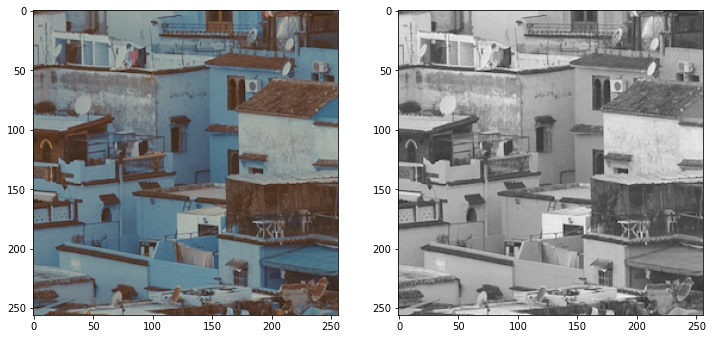

In [6]:
IMAGE_PATH = "https://raw.githubusercontent.com/dboesono/datasets/main/SVD-ImageCompressor-VideoExtractor/test_images/256_256_buildings.png"
img, img_gray = img_func.process_and_plot_image(IMAGE_PATH)

In [7]:
np.linalg.matrix_rank(img_gray)

256

In [8]:
%%time

max_norm=30
opt_rank_by_norm = img_func.get_optimal_rank(img_gray, by='norm', max_norm=max_norm)
print(f'optimum rank for frob_norm={max_norm} is {opt_rank_by_norm}')

optimum rank for frob_norm=30 is 1
Wall time: 56.8 ms


In [9]:
%%time

U, S, VT = img_func.numpy_svd(img_gray)
print(f'U: {U.shape}, S: {(S).shape}, VT: {VT.shape}')

U: (256, 256), S: (256, 256), VT: (256, 256)
Wall time: 49.4 ms


In [10]:
# Calculate Relative Error
Ub, Sb, VTb = img_func.phase_B_svd(img_gray)
Ua, Sa, VTa = img_func.phase_A_svd(img_gray)
Un, Sn, VTn = img_func.numpy_svd(img_gray)
print("Relative error of Phase A as compare to numpy's: ", img_func.relative_error(Sn,Sa))
print("Relative error of Phase B as compare to numpy's: ", img_func.relative_error(Sn,Sb))

Total Iterations: 262
Total Iterations: 542
Relative error of Phase A as compare to numpy's:  8.340962819032294e-15
Relative error of Phase B as compare to numpy's:  0.00021026315965405975


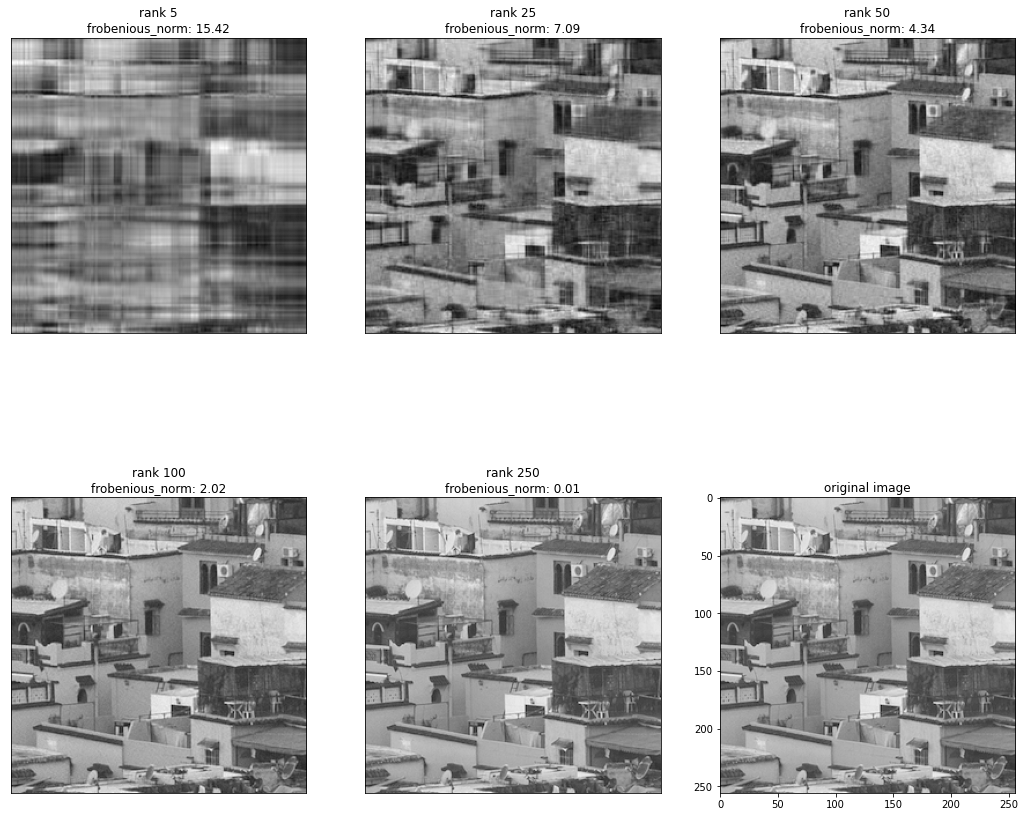

Wall time: 580 ms


In [11]:
%%time

img_func.plot_grayscale_images(U, S, VT, img_gray)

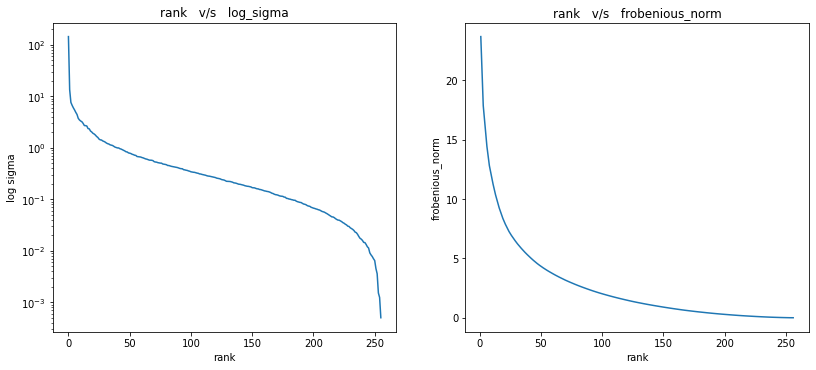

Wall time: 882 ms


In [12]:
%%time

img_func.plot_rank_v_sigma_and_frobenious_norm(U, S, VT, img_gray)

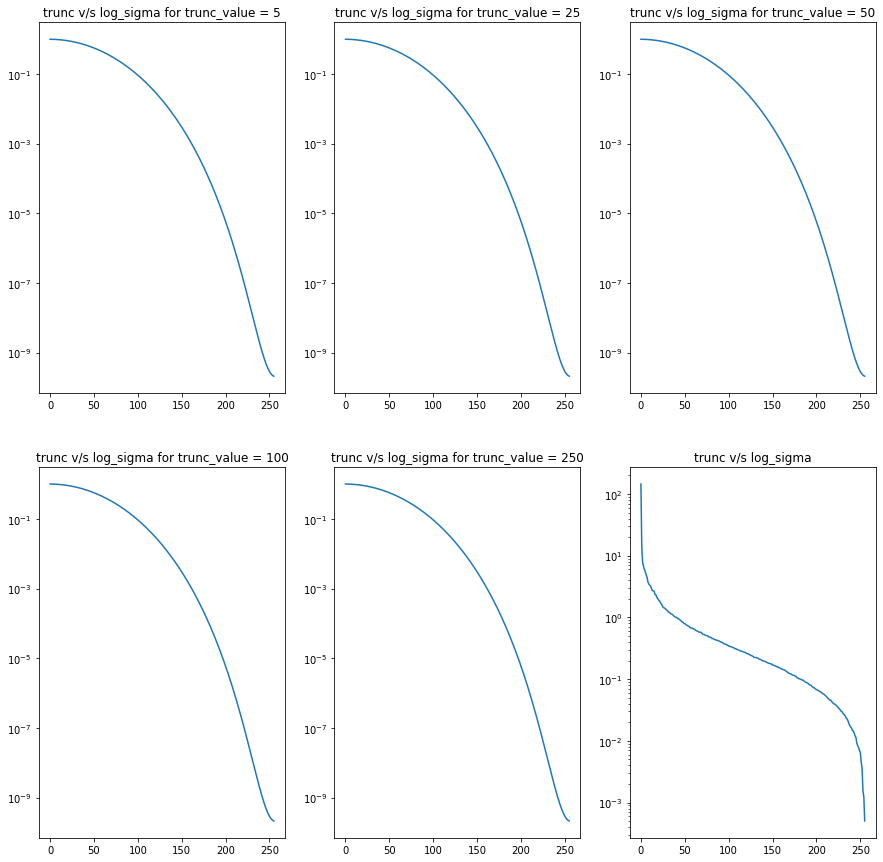

Wall time: 1.75 s


In [13]:
%%time

img_func.plot_truncate_svd(img_gray, S)

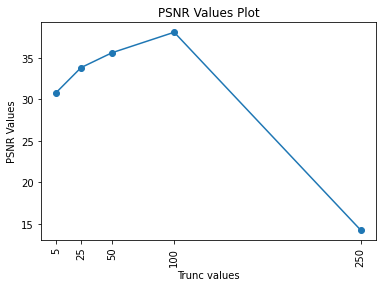

Wall time: 657 ms


In [14]:
%%time

img_func.plot_psnr_values(img_gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Wall time: 2.56 s


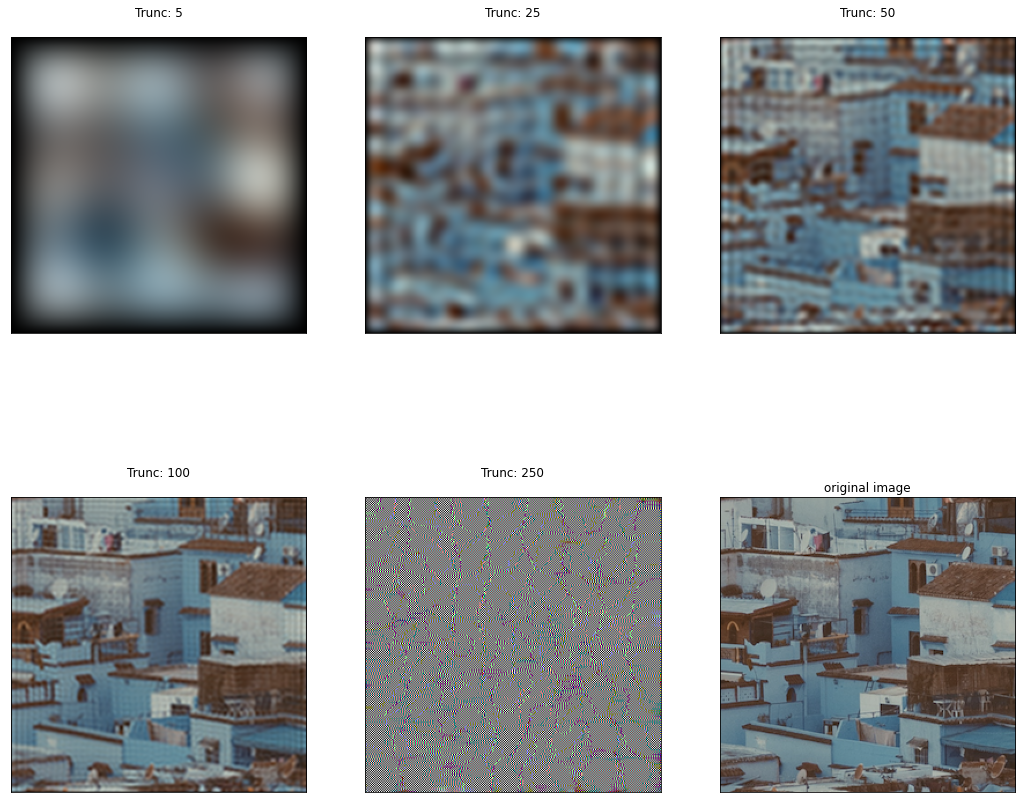

In [15]:
%%time

img_func.plot_image_channels(img)

## Image #2: 640_640_lizard.png

original image: (640, 640, 3)
grayscaled image: (640, 640)


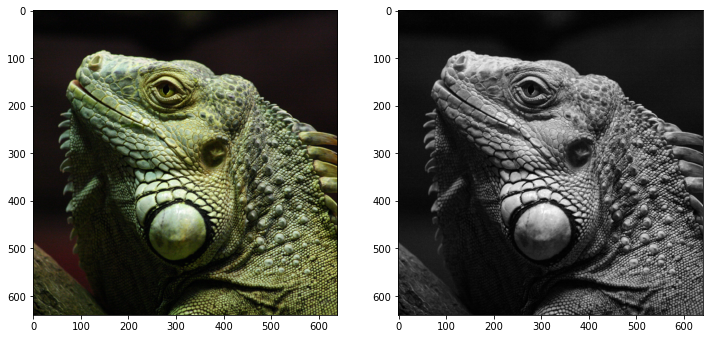

In [16]:
IMAGE_PATH = "https://raw.githubusercontent.com/dboesono/datasets/main/SVD-ImageCompressor-VideoExtractor/test_images/640_640_lizard.png"
img, img_gray = img_func.process_and_plot_image(IMAGE_PATH)

In [17]:
np.linalg.matrix_rank(img_gray)

640

In [18]:
%%time

max_norm=30
opt_rank_by_norm = img_func.get_optimal_rank(img_gray, by='norm', max_norm=max_norm)
print(f'optimum rank for frob_norm={max_norm} is {opt_rank_by_norm}')

optimum rank for frob_norm=30 is 88
Wall time: 532 ms


In [19]:
%%time

U, S, VT = img_func.numpy_svd(img_gray)
print(f'U: {U.shape}, S: {(S).shape}, VT: {VT.shape}')

U: (640, 640), S: (640, 640), VT: (640, 640)
Wall time: 212 ms


In [20]:
# Calculate Relative Error
Ub, Sb, VTb = img_func.phase_B_svd(img_gray)
Ua, Sa, VTa = img_func.phase_A_svd(img_gray)
Un, Sn, VTn = img_func.numpy_svd(img_gray)
print("Relative error of Phase A as compare to numpy's: ", img_func.relative_error(Sn,Sa))
print("Relative error of Phase B as compare to numpy's: ", img_func.relative_error(Sn,Sb))

Total Iterations: 655
Total Iterations: 1317
Relative error of Phase A as compare to numpy's:  4.142824213373056e-15
Relative error of Phase B as compare to numpy's:  0.00011745069328747145


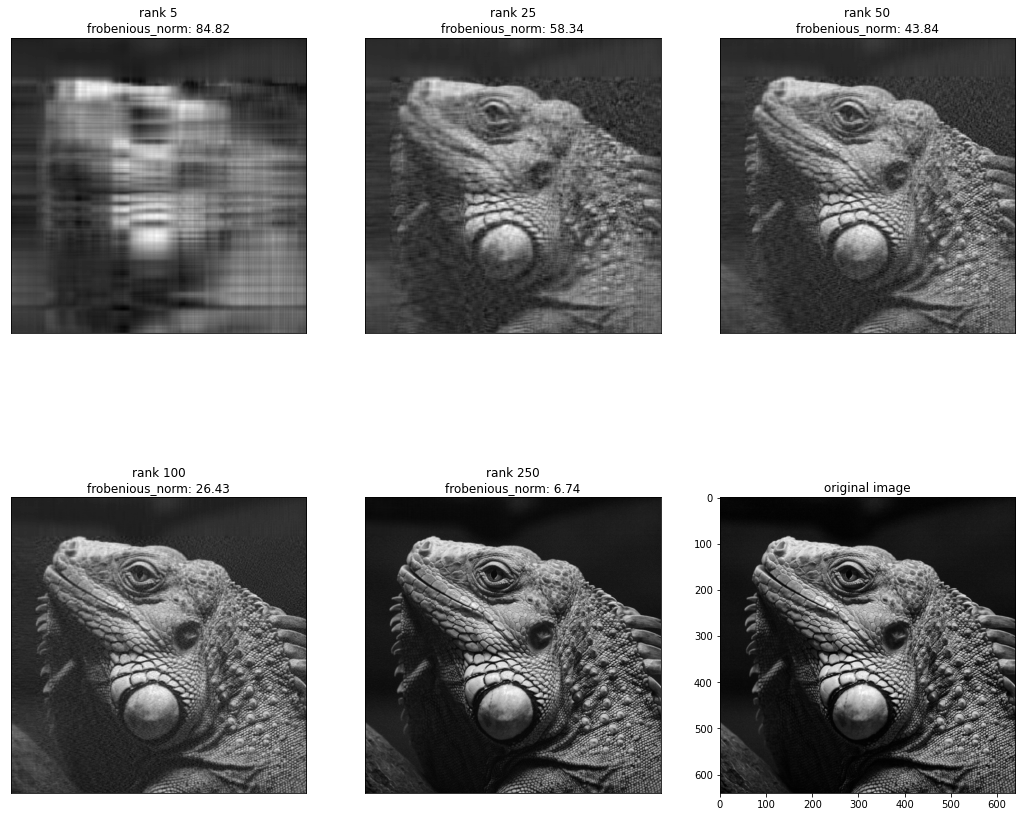

Wall time: 846 ms


In [21]:
%%time

img_func.plot_grayscale_images(U, S, VT, img_gray)

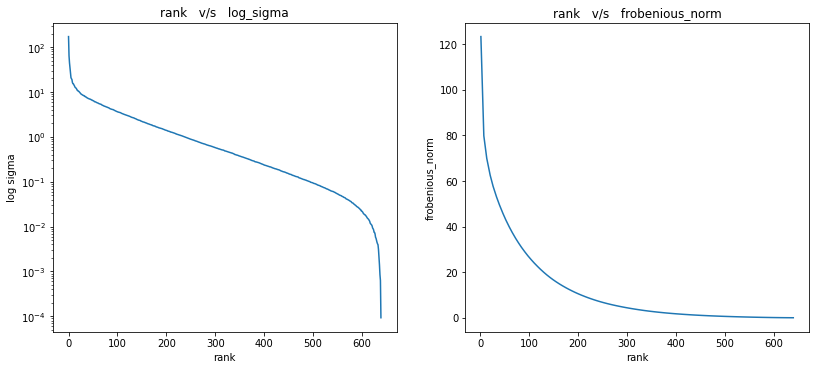

Wall time: 1.63 s


In [22]:
%%time

img_func.plot_rank_v_sigma_and_frobenious_norm(U, S, VT, img_gray)

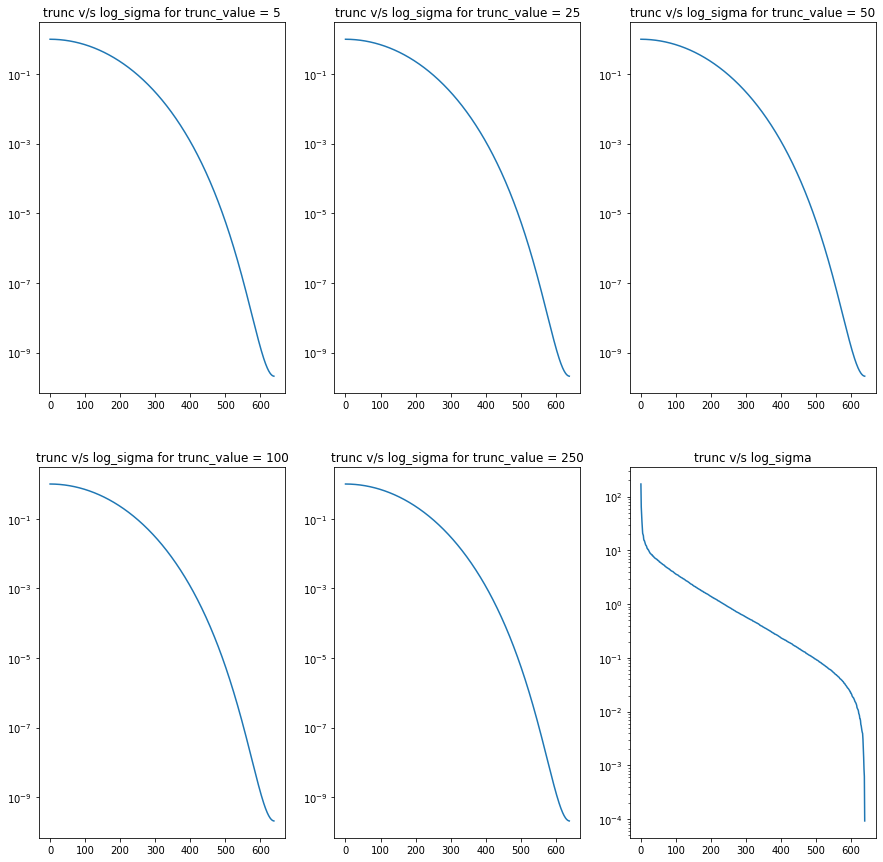

Wall time: 6.15 s


In [23]:
%%time

img_func.plot_truncate_svd(img_gray, S)

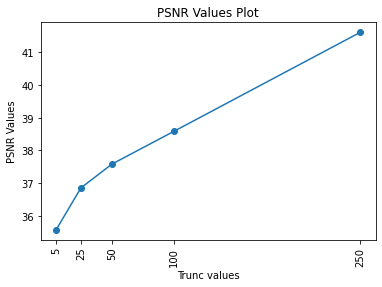

Wall time: 5.17 s


In [24]:
%%time

img_func.plot_psnr_values(img_gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Wall time: 31.1 s


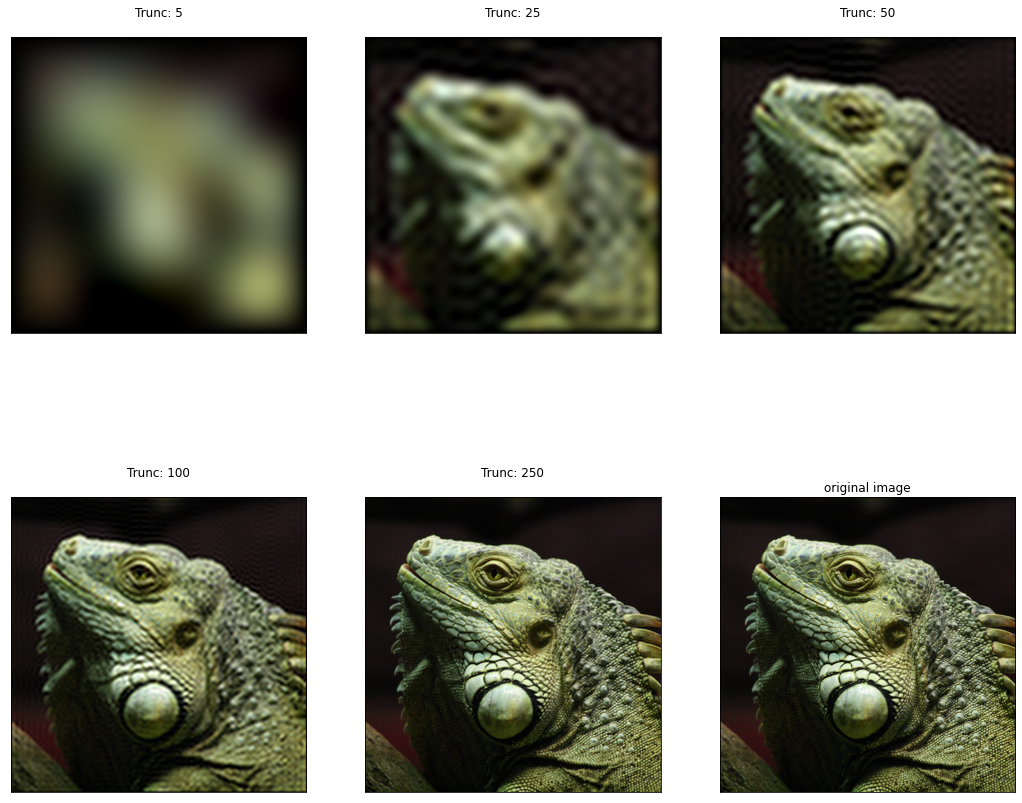

In [25]:
%%time

img_func.plot_image_channels(img)

## Image #3: 1024_1024_grassfield.png

original image: (1024, 1024, 4)
grayscaled image: (1024, 1024)


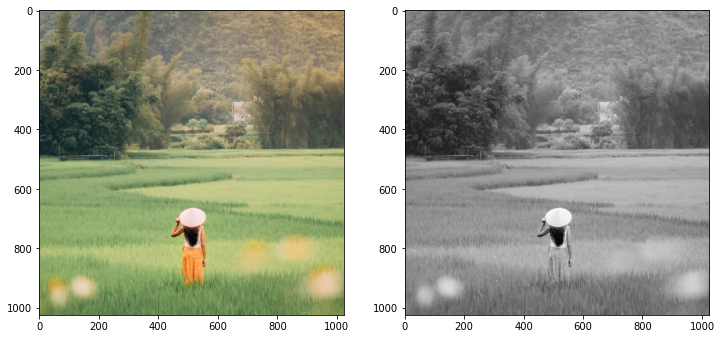

In [26]:
IMAGE_PATH = "https://raw.githubusercontent.com/dboesono/datasets/main/SVD-ImageCompressor-VideoExtractor/test_images/1024_1024_grassfield.png"
img, img_gray = img_func.process_and_plot_image(IMAGE_PATH)

In [27]:
np.linalg.matrix_rank(img_gray)

1024

In [28]:
%%time

max_norm=30
opt_rank_by_norm = img_func.get_optimal_rank(img_gray, by='norm', max_norm=max_norm)
print(f'optimum rank for frob_norm={max_norm} is {opt_rank_by_norm}')

optimum rank for frob_norm=30 is 12
Wall time: 786 ms


In [29]:
%%time

U, S, VT = img_func.numpy_svd(img_gray)
print(f'U: {U.shape}, S: {(S).shape}, VT: {VT.shape}')

U: (1024, 1024), S: (1024, 1024), VT: (1024, 1024)
Wall time: 628 ms


In [30]:
# Calculate Relative Error
Ub, Sb, VTb = img_func.phase_B_svd(img_gray)
Ua, Sa, VTa = img_func.phase_A_svd(img_gray)
Un, Sn, VTn = img_func.numpy_svd(img_gray)
print("Relative error of Phase A as compare to numpy's: ", img_func.relative_error(Sn,Sa))
print("Relative error of Phase B as compare to numpy's: ", img_func.relative_error(Sn,Sb))

Total Iterations: 1030
Total Iterations: 2084
Relative error of Phase A as compare to numpy's:  2.882493158114282e-14
Relative error of Phase B as compare to numpy's:  3.517803233498106e-05


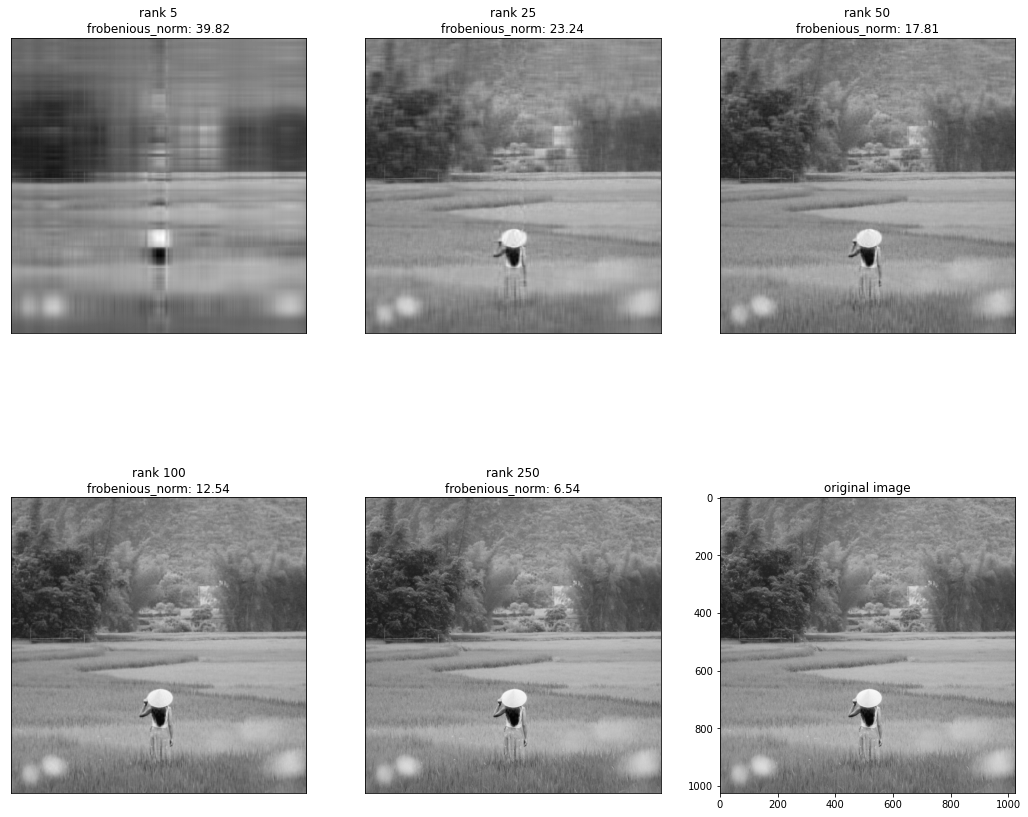

Wall time: 1.05 s


In [31]:
%%time

img_func.plot_grayscale_images(U, S, VT, img_gray)

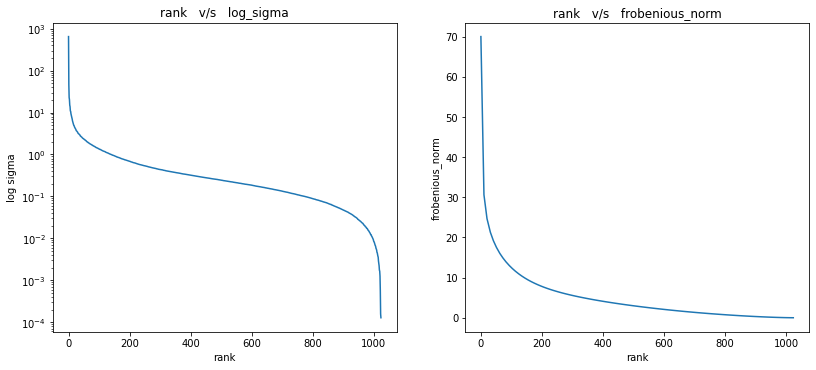

Wall time: 4.2 s


In [32]:
%%time

img_func.plot_rank_v_sigma_and_frobenious_norm(U, S, VT, img_gray)

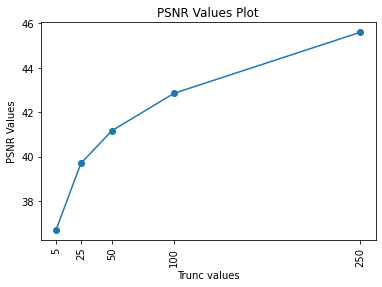

Wall time: 15.2 s


In [33]:
%%time

img_func.plot_psnr_values(img_gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Wall time: 2min 55s


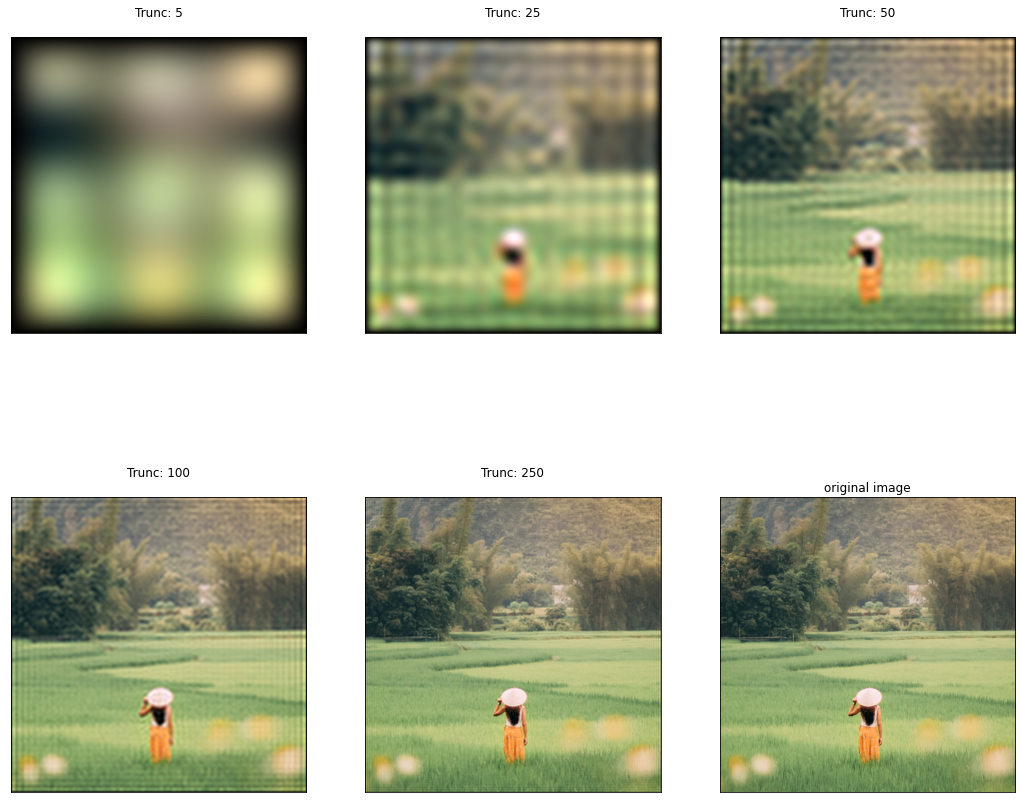

In [34]:
%%time

img_func.plot_image_channels(img)

# Video Background Extraction

In [35]:
VIDEO_PATH = "https://github.com/dboesono/datasets/raw/main/SVD-ImageCompressor-VideoExtractor/test_videos/"

In [36]:
%%time

B = extractor.mixed_color(VIDEO_PATH + "1280_720/pedestrians.mp4")

Wall time: 8.19 s


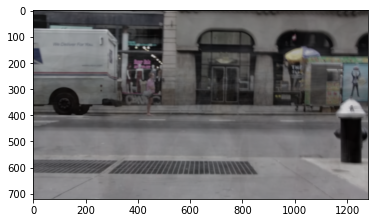

In [37]:
plt.imshow(B)

In [38]:
%%time

B = extractor.mixed_color(VIDEO_PATH + "2560_1440/street.mp4")

Wall time: 30.7 s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


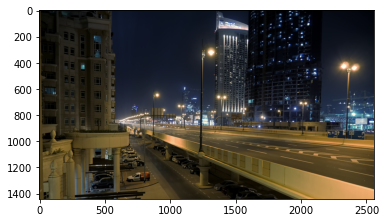

In [39]:
plt.imshow(B)